In [450]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [451]:
austin_crime = pd.read_csv('data/crime-housing-austin-2015.csv')
austin_weather = pd.read_csv('data/austin_weather.csv')
population_data = pd.read_csv('data/AustinZipCodes.csv')

austin_crime = austin_crime.drop('Location', axis=1)

def percentage_to_float(value):
    try:
        return float(value.strip('%')) / 100
    except:
        return value

def currency_to_float(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except:
        return value

percentage_columns = [
    'Populationbelowpovertylevel', 'Non-WhiteNon-HispanicorLatino', 
    'HispanicorLatinoofanyrace', 'Populationwithdisability', 'Unemployment',
    'Largehouseholds(5+members)', 'Homesaffordabletopeopleearninglessthan$50000',
    'Rentalsaffordabletopeopleearninglessthan$25000', 'Rent-restrictedunits',
    'HousingChoiceVoucherholders', 'Percentageofrentalunitsinpoorcondition',
    'Percentchangeinnumberofhousingunits2000-2012',
    'Changeinpercentageofpopulationbelowpoverty2000-2012',
    'Changeinmedianrent2000-2012', 'Changeinmedianhomevalue2000-2012',
    'Percentageofhomeswithin1/4-mioftransitstop',
    'Percentageofhousingandtransportationcoststhatistransportation-related'
]

currency_columns = ['Medianhouseholdincome', 'Medianrent', 'Medianhomevalue', 'Averagemonthlytransportationcost']

violent_crime = [
    'AGG ROBBERY/DEADLY WEAPON',
    'ROBBERY BY ASSAULT',
    'AGG ASLT W/MOTOR VEH FAM/DAT V',
    'AGG ASLT STRANGLE/SUFFOCATE',
    'AGG ASSAULT',
    'AGG ASLT ENHANC STRANGL/SUFFOC',
    'RAPE',
    'DEADLY CONDUCT',
    'AGG ASSAULT FAM/DATE VIOLENCE',
    'AGG RAPE OF A CHILD',
    'AGG RAPE',
    'ROBBERY BY THREAT',
    'AGG ROBBERY BY ASSAULT',
    'RAPE OF A CHILD',
    'AGG ASSAULT WITH MOTOR VEH',
    'MURDER',
    'AGG ASSAULT ON PUBLIC SERVANT',
    'DEADLY CONDUCT FAM/DATE VIOL',
    'MANSLAUGHTER'
]

for col in percentage_columns:
    austin_crime[col] = austin_crime[col].apply(percentage_to_float)

for col in currency_columns:
    austin_crime[col] = austin_crime[col].apply(currency_to_float)

print(austin_crime.dtypes)

Key                                                                        int64
Council_District                                                         float64
Highest_Offense_Desc                                                      object
Highest_NIBRS_UCR_Offense_Description                                     object
Report_Date                                                               object
Clearance_Status                                                          object
Clearance_Date                                                            object
District                                                                  object
Zip_Code_Crime                                                           float64
Census_Tract                                                             float64
X_Coordinate                                                             float64
Y_Coordinate                                                             float64
Zip_Code_Housing            

In [452]:
austin_crime['Zip_Code_Crime'].unique()

array([78753., 78751., 78744., 78741., 78727., 78721., 78759., 78757.,
       78752., 78758., 78702., 78704., 78701., 78719., 78723., 78745.,
       78748., 78617., 78729., 78653., 78756., 78746., 78722., 78731.,
       78703., 78724., 78747., 78749., 78726., 78705., 78717., 78750.,
       78613., 78754.,    nan, 78660., 78735., 78730., 78742., 78739.,
       78736., 78725., 78732., 78728., 78652., 78733., 78737., 78712.])

In [453]:
austin_weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [454]:
austin_crime

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,N,28-Jan-15,E,78753.0,18.13,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,N,13-Jan-15,I,78751.0,21.05,...,68%,10%,97%,42%,0.23,0.38,0.97,0.98,550.0,0.40
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,13-Jan-15,E,78753.0,18.35,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,5-Jan-15,I,78753.0,18.13,...,89%,75%,100%,98%,1.28,0.26,0.40,0.59,708.0,0.44
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,N,7-Jan-15,F,78744.0,24.27,...,81%,87%,100%,100%,0.89,0.26,0.44,0.63,708.0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,NaN,NaN,C,78702.0,8.02,...,80%,15%,99%,67%,0.03,0.73,2.07,0.96,590.0,0.39
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,N,13-Jan-16,A,78750.0,204.03,...,70%,15%,99%,51%,1.04,0.20,0.64,0.21,747.0,0.33
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,C,8-Feb-16,B,78731.0,17.18,...,67%,12%,97%,26%,0.26,0.31,0.68,0.44,747.0,0.32
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,N,10-Feb-16,C,78724.0,22.11,...,78%,84%,100%,96%,2.08,0.37,0.46,0.21,786.0,0.40


In [455]:
# pairplot = sns.pairplot(austin_crime, diag_kind='kde')
# plt.savefig('plots/pair_plot.png')

/tmp/ipykernel_588209/3797745235.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Month'] = pd.to_datetime(austin_crime['Report_Date']).dt.month


<Axes: xlabel='Month', ylabel='count'>

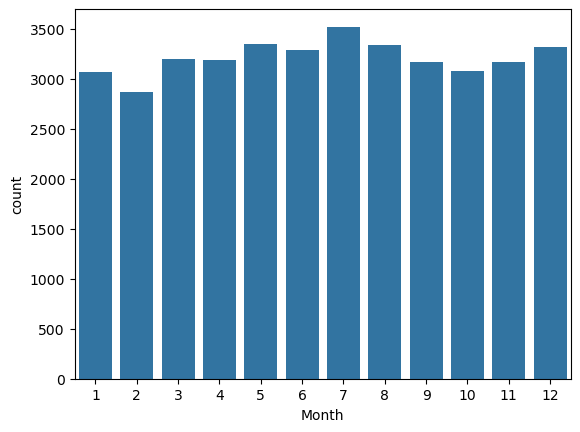

In [456]:
# Crime by month
austin_crime['Month'] = pd.to_datetime(austin_crime['Report_Date']).dt.month
sns.countplot(x='Month', data=austin_crime)

# TODO: Verify that month has no effect on crime rate per 1000 people with an ANOVA

/tmp/ipykernel_588209/1159251486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.dayofweek


<Axes: xlabel='Day', ylabel='count'>

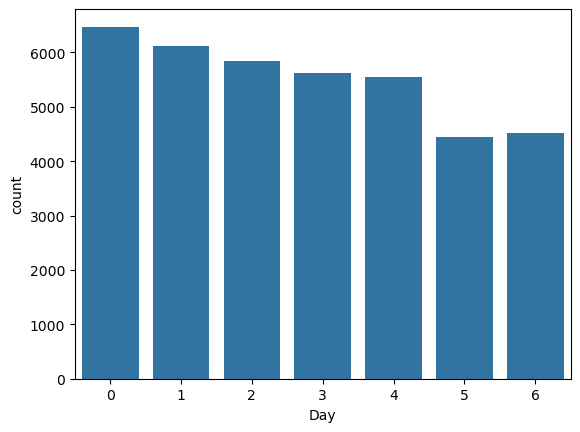

In [457]:
# Crime by day of week
austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.dayofweek
sns.countplot(x='Day', data=austin_crime)

/tmp/ipykernel_588209/4200704927.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.day


<Axes: xlabel='Day', ylabel='count'>

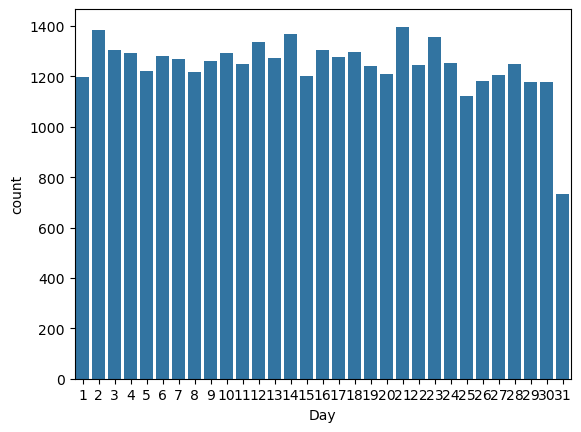

In [458]:
# Crime by day of month 
austin_crime['Day'] = pd.to_datetime(austin_crime['Report_Date']).dt.day
sns.countplot(x='Day', data=austin_crime)

In [459]:
# Merge crime and weather data, get a daily high and low temperature for each crime
high_low_temp = austin_weather.groupby('Date').agg({'TempHighF': 'max', 'TempLowF': 'min'}).reset_index()

# Convert the date to a datetime object, for high_low_temp and austin_crime
high_low_temp['Date'] = pd.to_datetime(high_low_temp['Date'])
austin_crime['Report_Date'] = pd.to_datetime(austin_crime['Report_Date'])

# Merge the two dataframes
austin_crime = austin_crime.merge(high_low_temp, left_on='Report_Date', right_on='Date')
austin_crime

/tmp/ipykernel_588209/2767542798.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_crime['Report_Date'] = pd.to_datetime(austin_crime['Report_Date'])


,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,...,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related,Month,Day,Date,TempHighF,TempLowF
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,2015-01-01,N,28-Jan-15,E,78753.0,18.13,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,2015-01-01,N,13-Jan-15,I,78751.0,21.05,...,0.38,0.97,0.98,550.0,0.40,1,1,2015-01-01,40,34
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,13-Jan-15,E,78753.0,18.35,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,5-Jan-15,I,78753.0,18.13,...,0.26,0.40,0.59,708.0,0.44,1,1,2015-01-01,40,34
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,N,7-Jan-15,F,78744.0,24.27,...,0.26,0.44,0.63,708.0,0.40,1,1,2015-01-01,40,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,2015-12-31,NaN,NaN,C,78702.0,8.02,...,0.73,2.07,0.96,590.0,0.39,12,31,2015-12-31,53,39
38569,20155056956,6.0,THEFT,Theft,2015-12-31,N,13-Jan-16,A,78750.0,204.03,...,0.20,0.64,0.21,747.0,0.33,12,31,2015-12-31,53,39
38570,20153651059,10.0,THEFT,Theft,2015-12-31,C,8-Feb-16,B,78731.0,17.18,...,0.31,0.68,0.44,747.0,0.32,12,31,2015-12-31,53,39
38571,20153651185,1.0,THEFT,Theft,2015-12-31,N,10-Feb-16,C,78724.0,22.11,...,0.37,0.46,0.21,786.0,0.40,12,31,2015-12-31,53,39


In [460]:
# Filter the merged data for crime, date, and high and low temperature
crime_temp = austin_crime[['Highest_Offense_Desc', 'Zip_Code_Crime', 'Report_Date', 'TempHighF', 'TempLowF', 'Populationbelowpovertylevel']]
crime_temp

,Highest_Offense_Desc,Zip_Code_Crime,Report_Date,TempHighF,TempLowF,Populationbelowpovertylevel
0,AGG ROBBERY/DEADLY WEAPON,78753.0,2015-01-01,40,34,0.26
1,ROBBERY BY ASSAULT,78751.0,2015-01-01,40,34,0.26
2,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26
3,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26
4,BURGLARY OF RESIDENCE,78744.0,2015-01-01,40,34,0.26
...,...,...,...,...,...,...
38568,THEFT,78702.0,2015-12-31,53,39,0.33
38569,THEFT,78750.0,2015-12-31,53,39,0.07
38570,THEFT,78731.0,2015-12-31,53,39,0.09
38571,THEFT,78724.0,2015-12-31,53,39,0.38


In [461]:
# Which zip codes are below the poverty level?
# TODO: Need to find some sources to backup this data. May be intersting to also control for population size in each zip. Industrial areas may have low population but high crime.
poverty = austin_crime[austin_crime['Populationbelowpovertylevel'] > 0.2].dropna()
# And median income is below $50,000
poverty = poverty[poverty['Medianhouseholdincome'] < 50000]

poverty_zips = poverty['Zip_Code_Crime'].unique()


def prepare_population_data(population_data):
    # Ensure 'Zip_Code' is the index
    population_data = population_data.set_index('Zip Code')
    
    # Convert Population to numeric, removing any commas
    population_data['Population'] = pd.to_numeric(population_data['Population'].astype(str).str.replace(',', ''), errors='coerce')
    
    return population_data


In [462]:
# With the new poverty zips, add a column boolean for poverty_zip
crime_temp['Poverty_Zip'] = crime_temp['Zip_Code_Crime'].apply(lambda x: x in poverty['Zip_Code_Crime'].unique())
crime_temp

# Pairplot of crime_temp
# pairplot = sns.pairplot(crime_temp, diag_kind='kde')
# plt.show()

/tmp/ipykernel_588209/3422514726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_temp['Poverty_Zip'] = crime_temp['Zip_Code_Crime'].apply(lambda x: x in poverty['Zip_Code_Crime'].unique())


,Highest_Offense_Desc,Zip_Code_Crime,Report_Date,TempHighF,TempLowF,Populationbelowpovertylevel,Poverty_Zip
0,AGG ROBBERY/DEADLY WEAPON,78753.0,2015-01-01,40,34,0.26,True
1,ROBBERY BY ASSAULT,78751.0,2015-01-01,40,34,0.26,True
2,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26,True
3,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26,True
4,BURGLARY OF RESIDENCE,78744.0,2015-01-01,40,34,0.26,True
...,...,...,...,...,...,...,...
38568,THEFT,78702.0,2015-12-31,53,39,0.33,True
38569,THEFT,78750.0,2015-12-31,53,39,0.07,False
38570,THEFT,78731.0,2015-12-31,53,39,0.09,False
38571,THEFT,78724.0,2015-12-31,53,39,0.38,True


In [463]:
display(crime_temp)

,Highest_Offense_Desc,Zip_Code_Crime,Report_Date,TempHighF,TempLowF,Populationbelowpovertylevel,Poverty_Zip
0,AGG ROBBERY/DEADLY WEAPON,78753.0,2015-01-01,40,34,0.26,True
1,ROBBERY BY ASSAULT,78751.0,2015-01-01,40,34,0.26,True
2,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26,True
3,BURGLARY OF RESIDENCE,78753.0,2015-01-01,40,34,0.26,True
4,BURGLARY OF RESIDENCE,78744.0,2015-01-01,40,34,0.26,True
...,...,...,...,...,...,...,...
38568,THEFT,78702.0,2015-12-31,53,39,0.33,True
38569,THEFT,78750.0,2015-12-31,53,39,0.07,False
38570,THEFT,78731.0,2015-12-31,53,39,0.09,False
38571,THEFT,78724.0,2015-12-31,53,39,0.38,True


<Axes: xlabel='Poverty_Zip', ylabel='TempHighF'>

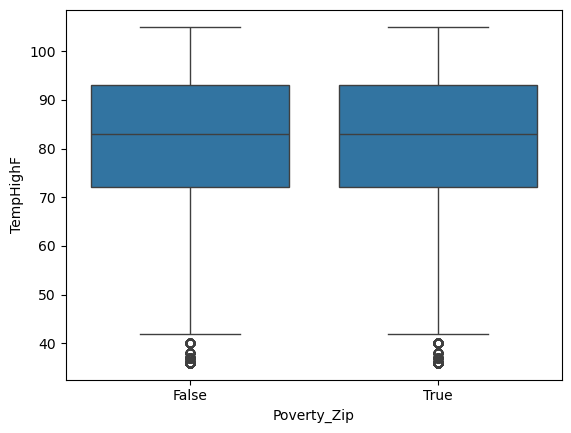

In [464]:
# Compare the high and low temperature for poverty and non-poverty zips
sns.boxplot(x='Poverty_Zip', y='TempHighF', data=crime_temp)

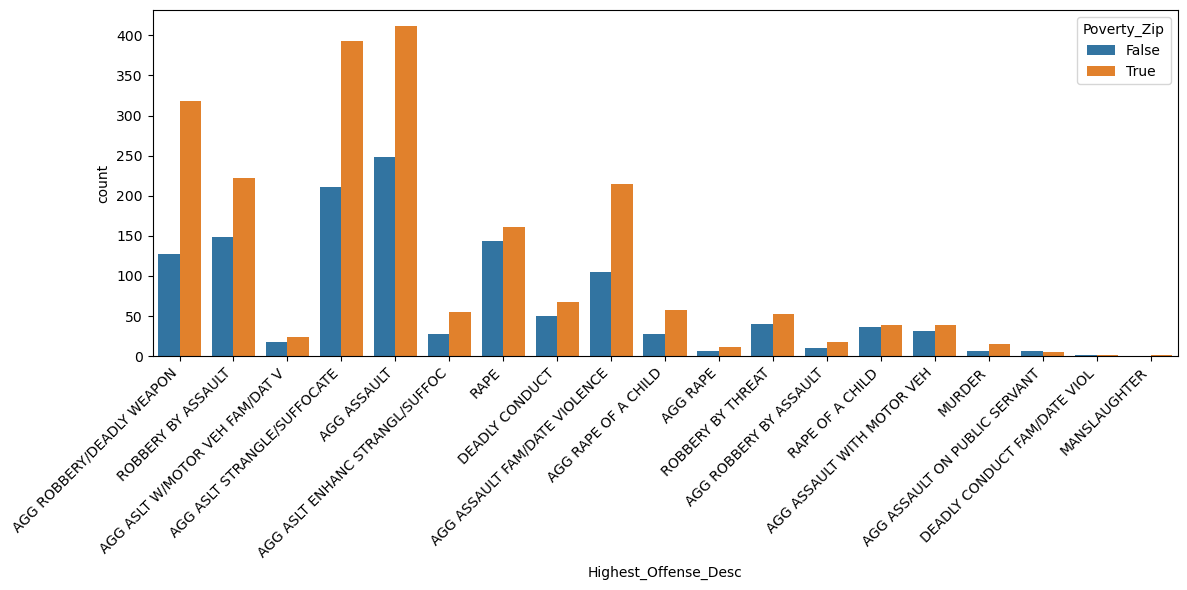

In [465]:
# Aggregate the Highest_Offense_Desc by poverty zip, compare crime in poverty zips by non-poverty zips
crime_poverty = crime_temp.groupby('Poverty_Zip')['Highest_Offense_Desc'].value_counts()


just_v_crime = crime_temp[crime_temp['Highest_Offense_Desc'].isin(violent_crime)]
# Create the countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.countplot(x='Highest_Offense_Desc', hue='Poverty_Zip', data=just_v_crime)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust the subplot layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# How many violent crimes occur in poverty zips, verses non-poverty zips?

# # Where does violent crime occur more often in poverty zips or non-poverty zips? Use the just_v_crime

# violent_crime_poverty_zips = just_v_crime[just_v_crime['Poverty_Zip'] == 'True']
# violent_crime_non_poverty_zips = just_v_crime[just_v_crime['Poverty_Zip'] == 'False']

# print(violent_crime_poverty_zips, violent_crime_non_poverty_zips)


In [466]:
def perform_population_adjusted_t_test(crime_data, population_data, crime_column, poverty_column, zip_column):
    # Prepare population data
    pop_df = prepare_population_data(population_data)
    
    # Merge crime data with population data
    merged_data = crime_data.merge(pop_df[['Population']], left_on=zip_column, right_index=True, how='left')
    
    # Group the data by poverty status and crime type, then count occurrences
    grouped = merged_data.groupby([poverty_column, zip_column, crime_column]).size().unstack(fill_value=0)
    
    # Calculate crime rates per 1000 people
    grouped_rates = grouped.div(merged_data.groupby([poverty_column, zip_column])['Population'].first(), axis=0) * 1000
    
    # Separate poverty and non-poverty rates
    poverty_rates = grouped_rates.xs(True, level=poverty_column).mean()
    non_poverty_rates = grouped_rates.xs(False, level=poverty_column).mean()
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(poverty_rates, non_poverty_rates)
    
    # Print results
    print("T-statistic:", t_statistic)
    print("p-value:", p_value)
    
    # Interpret the result
    alpha = 0.05  # Significance level
    if p_value <= alpha:
        print(f"\nThe difference in population-adjusted crime rates between poverty and non-poverty areas is statistically significant (p <= {alpha}).")
    else:
        print(f"\nThere is not enough evidence to conclude a significant difference in population-adjusted crime rates between poverty and non-poverty areas (p > {alpha}).")
    
    # Print mean rates for comparison
    print("\nMean crime rates per 1000 people:")
    print("Poverty areas:", poverty_rates.mean())
    print("Non-poverty areas:", non_poverty_rates.mean())

    # Additional statistics
    print("\nNumber of crimes in each category:")
    print(merged_data.groupby(poverty_column)[crime_column].count())
    
    print("\nNumber of unique zip codes in each category:")
    print(merged_data.groupby(poverty_column)[zip_column].nunique())

# Use the function
perform_population_adjusted_t_test(just_v_crime, population_data, 'Highest_Offense_Desc', 'Poverty_Zip', 'Zip_Code_Crime')

T-statistic: 1.1966855091967026
p-value: 0.23925078729102126

There is not enough evidence to conclude a significant difference in population-adjusted crime rates between poverty and non-poverty areas (p > 0.05).

Mean crime rates per 1000 people:
Poverty areas: 0.36636276893380754
Non-poverty areas: 0.22137518349391486

Number of crimes in each category:
Poverty_Zip
False    1244
True     2102
Name: Highest_Offense_Desc, dtype: int64

Number of unique zip codes in each category:
Poverty_Zip
False    32
True     12
Name: Zip_Code_Crime, dtype: int64


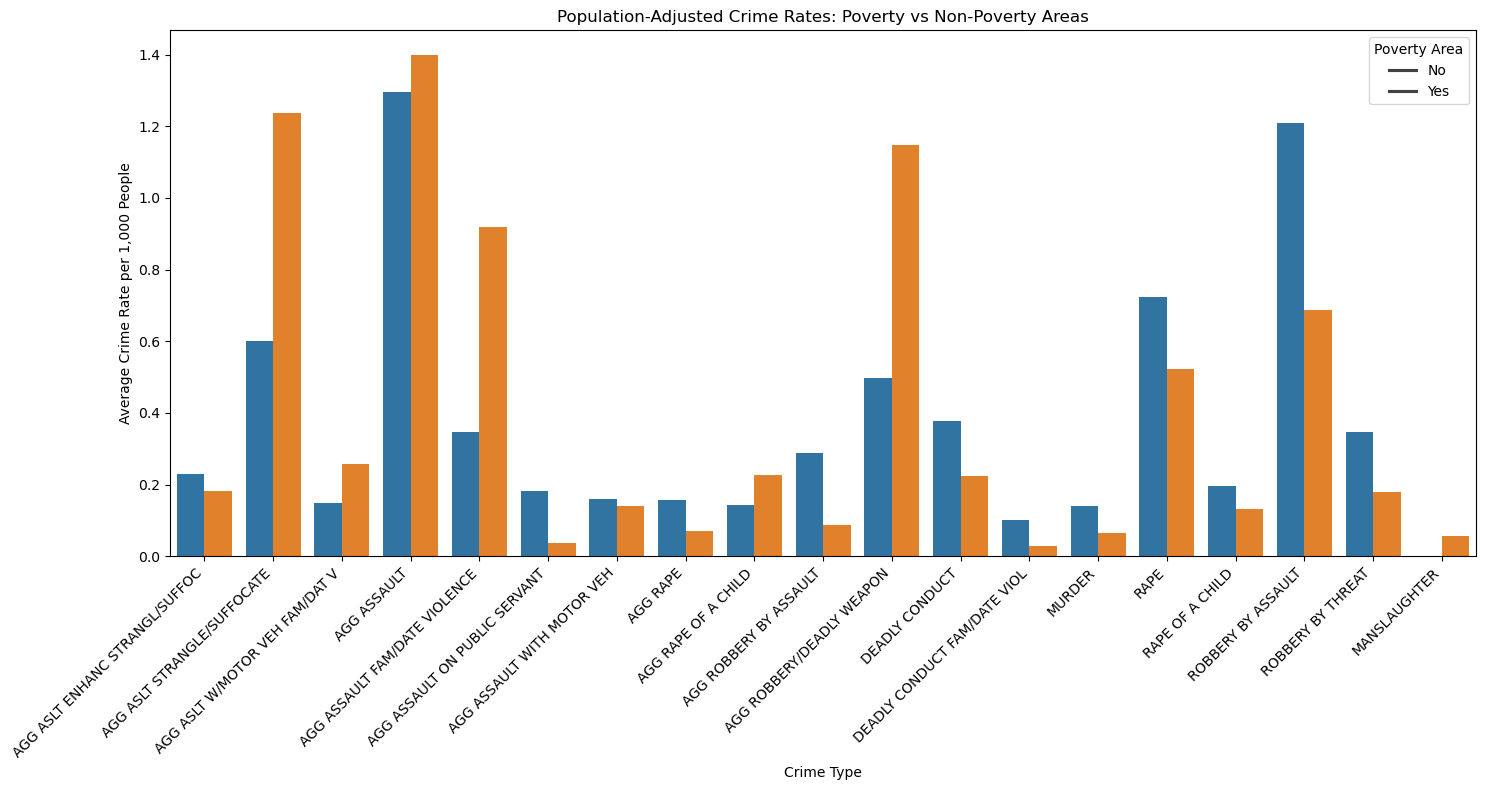

Average crime rates per 1,000 people:
Poverty_Zip
False    0.396852
True     0.399589
Name: Rate, dtype: float64

Total number of crimes:
Poverty_Zip
False    1200
True     2102
Name: Count, dtype: int64

Number of unique zip codes in each category:
Poverty_Zip
False    32
True     12
Name: Zip_Code_Crime, dtype: int64


In [467]:
def create_population_adjusted_crime_graph(crime_data, population_data, crime_column, poverty_column, zip_column):
    # Prepare population data
    pop_df = population_data.set_index('Zip Code')
    pop_df['Population'] = pd.to_numeric(pop_df['Population'].astype(str).str.replace(',', ''), errors='coerce')
    
    # Merge crime data with population data
    merged_data = crime_data.merge(pop_df[['Population']], left_on=zip_column, right_index=True, how='left')
    
    # Calculate crime rates per 1000 people
    crime_counts = merged_data.groupby([poverty_column, zip_column, crime_column]).size().reset_index(name='Count')
    crime_rates = crime_counts.merge(merged_data.groupby([poverty_column, zip_column])['Population'].first().reset_index(), 
                                     on=[poverty_column, zip_column])
    crime_rates['Rate'] = crime_rates['Count'] / crime_rates['Population'] * 1000
    
    # Calculate average rates for each crime type and poverty status
    avg_rates = crime_rates.groupby([poverty_column, crime_column])['Rate'].mean().reset_index()
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x=crime_column, y='Rate', hue=poverty_column, data=avg_rates)
    plt.title('Population-Adjusted Crime Rates: Poverty vs Non-Poverty Areas')
    plt.xlabel('Crime Type')
    plt.ylabel('Average Crime Rate per 1,000 People')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Poverty Area', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()
    
    # Print additional statistics
    print("Average crime rates per 1,000 people:")
    print(avg_rates.groupby(poverty_column)['Rate'].mean())
    
    print("\nTotal number of crimes:")
    print(crime_counts.groupby(poverty_column)['Count'].sum())
    
    print("\nNumber of unique zip codes in each category:")
    print(merged_data.groupby(poverty_column)[zip_column].nunique())

# Use the function
create_population_adjusted_crime_graph(just_v_crime, population_data, 'Highest_Offense_Desc', 'Poverty_Zip', 'Zip_Code_Crime')

In [468]:
def check_normality(data, title):
    """
    Perform normality checks on the given data.
    """
    # Visual checks
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    sns.histplot(data, kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {title}')
    
    # Q-Q plot
    qqplot(data, line='s', ax=ax2)
    ax2.set_title(f'Q-Q Plot of {title}')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    _, shapiro_p = stats.shapiro(data)
    _, ks_p = stats.kstest(data, 'norm')
    
    print(f"Normality tests for {title}:")
    print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p:.4f}")
    print("If p-value < 0.05, the data significantly deviates from normal distribution.\n")

Dropped 54 rows with NaN values.
Number of high temperature days: 863
Number of low temperature days: 1631
Range of high temperature rates: 0.018852273584194255 to 1.6
Range of low temperature rates: 0.018852273584194255 to 1.6

Temperature threshold: 90°F
Mann-Whitney U statistic: 743594.5
p-value: 0.019857496509525174

The difference in violent crime rates between high temperature (>=90°F) and low temperature (<90°F) days is statistically significant (p <= 0.05).

Median violent crime rates per 1000 people:
High temperature days (>=90°F): 0.045238633793259445
Low temperature days (<90°F): 0.04437738528445904

Effect size (rank-biserial correlation): -0.0566


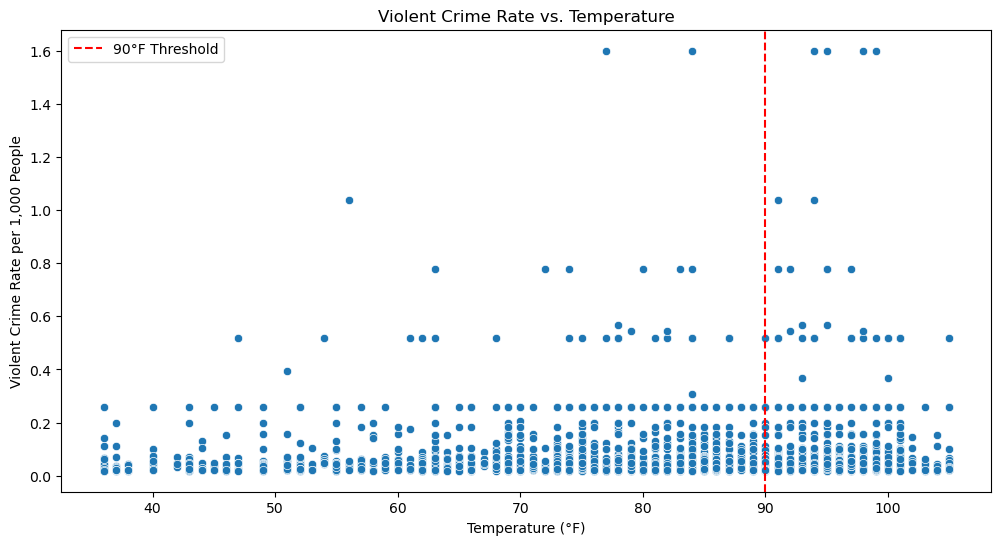

In [469]:
def analyze_temperature_impact(crime_data, population_data, temp_threshold=80):
    # Prepare population data
    pop_df = population_data.set_index('Zip Code')
    pop_df['Population'] = pd.to_numeric(pop_df['Population'].astype(str).str.replace(',', ''), errors='coerce')
    
    # Merge crime data with population data
    merged_data = crime_data.merge(pop_df[['Population']], left_on='Zip_Code_Crime', right_index=True, how='left')
    
    # Create high temp and low temp groups
    merged_data['High_Temp'] = merged_data['TempHighF'] >= temp_threshold
    
    # Calculate daily crime rates per 1000 people for each zip code
    daily_rates = merged_data.groupby(['Report_Date', 'Zip_Code_Crime', 'High_Temp', 'TempHighF']).size().reset_index(name='Count')
    daily_rates = daily_rates.merge(merged_data[['Zip_Code_Crime', 'Population']].drop_duplicates(), on='Zip_Code_Crime')
    daily_rates['Rate'] = daily_rates['Count'] / daily_rates['Population'] * 1000
    
    # Drop NaN values
    original_count = len(daily_rates)
    daily_rates = daily_rates.dropna()
    dropped_count = original_count - len(daily_rates)
    print(f"Dropped {dropped_count} rows with NaN values.")
    
    # Separate high temp and low temp rates
    high_temp_rates = daily_rates[daily_rates['High_Temp']]['Rate']
    low_temp_rates = daily_rates[~daily_rates['High_Temp']]['Rate']
    
    # Print diagnostic information
    print(f"Number of high temperature days: {len(high_temp_rates)}")
    print(f"Number of low temperature days: {len(low_temp_rates)}")
    print(f"Range of high temperature rates: {high_temp_rates.min()} to {high_temp_rates.max()}")
    print(f"Range of low temperature rates: {low_temp_rates.min()} to {low_temp_rates.max()}")
    
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(high_temp_rates, low_temp_rates, alternative='two-sided')
    
    # Print results
    print(f"\nTemperature threshold: {temp_threshold}°F")
    print("Mann-Whitney U statistic:", statistic)
    print("p-value:", p_value)
    
    # Interpret the result
    alpha = 0.05  # Significance level
    if p_value <= alpha:
        print(f"\nThe difference in violent crime rates between high temperature (>={temp_threshold}°F) and low temperature (<{temp_threshold}°F) days is statistically significant (p <= {alpha}).")
    else:
        print(f"\nThere is not enough evidence to conclude a significant difference in violent crime rates between high temperature (>={temp_threshold}°F) and low temperature (<{temp_threshold}°F) days (p > {alpha}).")
    
    # Print median rates for comparison (using median instead of mean for non-parametric analysis)
    print("\nMedian violent crime rates per 1000 people:")
    print(f"High temperature days (>={temp_threshold}°F):", high_temp_rates.median())
    print(f"Low temperature days (<{temp_threshold}°F):", low_temp_rates.median())
    
    # Calculate and print the effect size (rank-biserial correlation)
    n1, n2 = len(high_temp_rates), len(low_temp_rates)
    effect_size = 1 - (2 * statistic) / (n1 * n2)
    print(f"\nEffect size (rank-biserial correlation): {effect_size:.4f}")
    
    # # Visualize the distribution of crime rates
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x='High_Temp', y='Rate', data=daily_rates)
    # plt.title(f'Distribution of Violent Crime Rates: High vs Low Temperature (Threshold: {temp_threshold}°F)')
    # plt.xlabel('High Temperature Day')
    # plt.ylabel('Violent Crime Rate per 1,000 People')
    # plt.show()
    
    # Scatter plot of temperature vs crime rates
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='TempHighF', y='Rate', data=daily_rates)
    plt.title('Violent Crime Rate vs. Temperature')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Violent Crime Rate per 1,000 People')
    plt.axvline(x=temp_threshold, color='r', linestyle='--', label=f'{temp_threshold}°F Threshold')
    plt.legend()
    plt.show()

# Use the function with just_v_crime
analyze_temperature_impact(just_v_crime, population_data, temp_threshold=90)

In [474]:
def analyze_temperature_poverty_impact(crime_data, population_data, poverty_zips, temp_threshold=90):
    # Prepare population data
    pop_df = population_data.set_index('Zip Code')
    pop_df['Population'] = pd.to_numeric(pop_df['Population'].astype(str).str.replace(',', ''), errors='coerce')
    
    # Merge crime data with population data
    merged_data = crime_data.merge(pop_df[['Population']], left_on='Zip_Code_Crime', right_index=True, how='left')
    
    # Create high temp and poverty flags
    merged_data['High_Temp'] = merged_data['TempHighF'] >= temp_threshold
    merged_data['Poverty_Zip'] = merged_data['Zip_Code_Crime'].isin(poverty_zips)
    
    # Calculate daily crime rates per 1000 people for each zip code
    daily_rates = merged_data.groupby(['Report_Date', 'Zip_Code_Crime', 'High_Temp', 'Poverty_Zip', 'TempHighF']).size().reset_index(name='Count')
    daily_rates = daily_rates.merge(merged_data[['Zip_Code_Crime', 'Population']].drop_duplicates(), on='Zip_Code_Crime')
    daily_rates['Rate'] = daily_rates['Count'] / daily_rates['Population'] * 1000
    
    # Drop NaN values
    original_count = len(daily_rates)
    daily_rates = daily_rates.dropna()
    dropped_count = original_count - len(daily_rates)
    print(f"Dropped {dropped_count} rows with NaN values.")
    
    # Debug: Print sample data
    print("\nSample data:")
    print(daily_rates.sample(5))
    
    # Separate data into four groups
    high_temp_poverty = daily_rates[(daily_rates['High_Temp']) & (daily_rates['Poverty_Zip'])]['Rate']
    low_temp_poverty = daily_rates[(~daily_rates['High_Temp']) & (daily_rates['Poverty_Zip'])]['Rate']
    high_temp_non_poverty = daily_rates[(daily_rates['High_Temp']) & (~daily_rates['Poverty_Zip'])]['Rate']
    low_temp_non_poverty = daily_rates[(~daily_rates['High_Temp']) & (~daily_rates['Poverty_Zip'])]['Rate']
    
    # Debug: Print sample data for each group
    print("\nSample data for each group:")
    print("High temp, poverty:")
    print(high_temp_poverty.head())
    print("\nLow temp, poverty:")
    print(low_temp_poverty.head())
    print("\nHigh temp, non-poverty:")
    print(high_temp_non_poverty.head())
    print("\nLow temp, non-poverty:")
    print(low_temp_non_poverty.head())
    
    # Print diagnostic information
    print(f"\nNumber of high temperature days in poverty areas: {len(high_temp_poverty)}")
    print(f"Number of low temperature days in poverty areas: {len(low_temp_poverty)}")
    print(f"Number of high temperature days in non-poverty areas: {len(high_temp_non_poverty)}")
    print(f"Number of low temperature days in non-poverty areas: {len(low_temp_non_poverty)}")
    
    # Perform Mann-Whitney U tests
    poverty_statistic, poverty_p_value = stats.mannwhitneyu(high_temp_poverty, low_temp_poverty, alternative='two-sided')
    non_poverty_statistic, non_poverty_p_value = stats.mannwhitneyu(high_temp_non_poverty, low_temp_non_poverty, alternative='two-sided')
    
    # Print results
    print(f"\nTemperature threshold: {temp_threshold}°F")
    print("\nPoverty Areas:")
    print("Mann-Whitney U statistic:", poverty_statistic)
    print("p-value:", poverty_p_value)
    print("\nNon-Poverty Areas:")
    print("Mann-Whitney U statistic:", non_poverty_statistic)
    print("p-value:", non_poverty_p_value)
    
    # Interpret the results
    alpha = 0.05  # Significance level
    for area_type, p_value in [("Poverty", poverty_p_value), ("Non-Poverty", non_poverty_p_value)]:
        if p_value <= alpha:
            print(f"\nThe difference in crime rates between high temperature (>={temp_threshold}°F) and low temperature (<{temp_threshold}°F) days in {area_type} areas is statistically significant (p <= {alpha}).")
        else:
            print(f"\nThere is not enough evidence to conclude a significant difference in crime rates between high temperature (>={temp_threshold}°F) and low temperature (<{temp_threshold}°F) days in {area_type} areas (p > {alpha}).")
    
    # Print median rates for comparison
    print("\nMedian violent crime rates per 1000 people:")
    print("Poverty Areas:")
    print(f"High temperature days (>={temp_threshold}°F):", high_temp_poverty.median())
    print(f"Low temperature days (<{temp_threshold}°F):", low_temp_poverty.median())
    print("Non-Poverty Areas:")
    print(f"High temperature days (>={temp_threshold}°F):", high_temp_non_poverty.median())
    print(f"Low temperature days (<{temp_threshold}°F):", low_temp_non_poverty.median())
    
    # Calculate and print the effect sizes (rank-biserial correlation)
    poverty_effect_size = 1 - (2 * poverty_statistic) / (len(high_temp_poverty) * len(low_temp_poverty))
    non_poverty_effect_size = 1 - (2 * non_poverty_statistic) / (len(high_temp_non_poverty) * len(low_temp_non_poverty))
    print(f"\nEffect size (rank-biserial correlation) for Poverty Areas: {poverty_effect_size:.4f}")
    print(f"Effect size (rank-biserial correlation) for Non-Poverty Areas: {non_poverty_effect_size:.4f}")
    
    # Add summary statistics
    print("\nSummary Statistics:")
    for group in ['Poverty', 'Non-Poverty']:
        for temp in ['High', 'Low']:
            data = daily_rates[
                (daily_rates['Poverty_Zip'] if group == 'Poverty' else ~daily_rates['Poverty_Zip']) &
                (daily_rates['High_Temp'] if temp == 'High' else ~daily_rates['High_Temp'])
            ]['Rate']
            print(f"\n{group} Areas, {temp} Temperature:")
            print(f"Mean: {data.mean():.6f}")
            print(f"Median: {data.median():.6f}")
            print(f"Std Dev: {data.std():.6f}")
            print(f"Min: {data.min():.6f}")
            print(f"Max: {data.max():.6f}")

# Use the updated function
analyze_temperature_poverty_impact(just_v_crime, population_data, poverty_zips, temp_threshold=90)

Dropped 54 rows with NaN values.

Sample data:
     Report_Date  Zip_Code_Crime  High_Temp  Poverty_Zip  TempHighF  Count  \
2035  2015-10-16         78753.0       True         True         90      1   
1221  2015-06-26         78751.0       True         True         93      1   
59    2015-01-09         78758.0      False         True         38      1   
1253  2015-06-30         78729.0       True        False         94      1   
1138  2015-06-14         78721.0      False         True         86      1   

      Population      Rate  
2035     44210.0  0.022619  
1221     14005.0  0.071403  
59       42820.0  0.023354  
1253     24561.0  0.040715  
1138     10124.0  0.098775  

Sample data for each group:
High temp, poverty:
758    0.066423
759    0.024594
761    0.055463
762    0.022619
764    0.046707
Name: Rate, dtype: float64

Low temp, poverty:
0    0.044377
1    0.098775
2    0.029668
3    0.071403
4    0.045239
Name: Rate, dtype: float64

High temp, non-poverty:
760     0.03

In [475]:
analyze_temperature_poverty_impact(crime_temp, population_data, poverty_zips, temp_threshold=90)

Dropped 564 rows with NaN values.

Sample data:
     Report_Date  Zip_Code_Crime  High_Temp  Poverty_Zip  TempHighF  Count  \
2143  2015-03-22         78744.0      False         True         78      3   
3366  2015-05-05         78726.0      False        False         83      1   
1832  2015-03-11         78705.0      False         True         59      4   
7087  2015-09-13         78745.0       True        False         91     12   
429   2015-01-17         78744.0      False         True         69      5   

      Population      Rate  
2143     33706.0  0.089005  
3366      6480.0  0.154321  
1832     26825.0  0.149115  
7087     53044.0  0.226227  
429      33706.0  0.148342  

Sample data for each group:
High temp, poverty:
3075    0.177510
3077    0.186393
3078    0.197550
3080    0.099635
3081    0.064817
Name: Rate, dtype: float64

Low temp, poverty:
3     0.133132
6     0.296326
8     0.232481
11    0.221342
12    0.267015
Name: Rate, dtype: float64

High temp, non-poverty:
3